# Global Power Plant Database

## Problem Statement:

### Description:

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

### Key attributes of the database

The database includes the following indicators:

- `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
- `country_long` (text): longer form of the country designation
- `name` (text): name or title of the power plant, generally in Romanized form
- `gppd_idnr` (text): 10 or 12 character identifier for the power plant
- `capacity_mw` (number): electrical generating capacity in megawatts
- `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `primary_fuel` (text): energy source used in primary electricity generation or export
- `other_fuel1` (text): energy source used in electricity generation or export
- `other_fuel2` (text): energy source used in electricity generation or export
- `other_fuel3` (text): energy source used in electricity generation or export
- `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
- `owner` (text): majority shareholder of the power plant, generally in Romanized form
- `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- `url` (text): web document corresponding to the `source` field
- `geolocation_source` (text): attribution for geolocation information
- `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- `year_of_capacity_data` (number): year the capacity information was reported
- `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
- `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
- `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
- `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
- `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
- `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
- `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
- `generation_data_source` (text): attribution for the reported generation information
- `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
- `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
- `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
- `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
- `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
- 'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
- `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
- `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
- `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
- `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

### Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories.

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dataset has 907 rows and 27 columns

We can see that the dataset is comprised of 27 columns including two target variables capacity_mw and primary_fuel(Fuel_Type) where we need to predict both capacity_mw and Fuel Type.

In [3]:
# Let's define primary_fuel as Fuel_Type to understand the dataset in better way
df.rename(columns={'primary_fuel':'Fuel_Type'},inplace=True)

## Exploratory Data Analysis (EDA)

In [4]:
#getting the shape of the dataset.
df.shape

(907, 27)

As mentioned above we have 907 rows and 27 columns

In [5]:
# Getting an overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   Fuel_Type                 907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

We can clearly see that we have null values and also object datatype, which we will handle seperately by imputer and encoding techniques

In [6]:
#checking of the data types of the dataset
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
Fuel_Type                    object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

The features that needs encoding are country, country_long, name, gppd_idnr,Fuel_Type,other_fuel1,other_fuel2, owner, source, url, geolocation_source,generation_data_source as they are object data type and the ML model needs numeric datatype.

In [7]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
Fuel_Type                     0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

It can be clearly seen that we have high number of null values and will treat accordingly.

In [8]:
# Checking number of unique values in each column
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
Fuel_Type                     8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

Here the columns country, country_long, other_fuel2, year_of_capacity_data and generation_data_source have only one unique value. Also other_fuel3, wepp_id, estimated_generation_gwh,generation_gwh_2013 and generation_gwh_2019 have no unique values which means they are filled with only NAN values. Since these columns have same entries thoughout the dataset so we can drop these columns.

So let's do some feature engineering here.

## Feature Selection

In [9]:
# Checking the count of the country
df["country"].value_counts()

IND    907
Name: country, dtype: int64

In [10]:
# Checking the count of the country_long
df["country_long"].value_counts()

India    907
Name: country_long, dtype: int64

We see that only IND is listed in the country hence there is no impact of these two features on prediction

In [11]:
df.drop(columns=["country","country_long"],axis=1,inplace=True)

In [12]:
# Dropping irrelevant columns
df.drop(columns=["other_fuel2", "year_of_capacity_data","generation_data_source","other_fuel3","wepp_id","generation_gwh_2013","estimated_generation_gwh","generation_gwh_2019"],axis=1,inplace=True)

In [13]:
# Checking the count of name
df["name"].value_counts()

MELAMARUTHUR (MUTHIARA)    1
Tiruppur 2                 1
KHARA                      1
KORBA-WEST                 1
AKRIMOTA LIG               1
                          ..
KOTLA                      1
KORADI                     1
VAITARNA                   1
MALLARPUR                  1
VALUTHUR GT                1
Name: name, Length: 907, dtype: int64

In [14]:
df["gppd_idnr"].value_counts()

WRI1026208    1
IND0000343    1
WRI1019911    1
IND0000136    1
IND0000194    1
             ..
WRI1026115    1
WRI1026064    1
WRI1019995    1
IND0000506    1
IND0000381    1
Name: gppd_idnr, Length: 907, dtype: int64

We can see that each power plant has unique name and hence we can drop these features

In [15]:
#Dropping the columns that has no impact on the prediction
df.drop("name",axis=1,inplace=True) 
df.drop("gppd_idnr",axis=1,inplace=True)
df.drop("owner",axis=1,inplace=True)
df.drop("url",axis=1,inplace=True)

In [16]:
df.shape

(907, 13)

In [17]:
# Checking null values again after feature selection
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
Fuel_Type                0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

<AxesSubplot:>

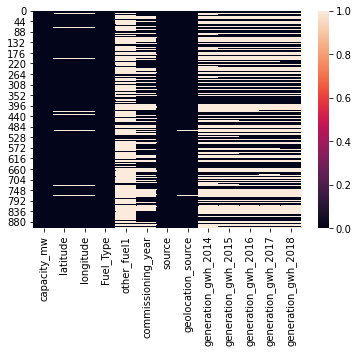

In [18]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull())

We can clearly observe the white lines in the heat map which indicates the missing values in the dataset.

In [19]:
#Checking the skewness of the dataset
df.skew().sort_values()

commissioning_year    -1.067949
latitude              -0.145866
longitude              1.112646
capacity_mw            3.123576
generation_gwh_2014    3.342707
generation_gwh_2018    3.476298
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2015    3.665904
dtype: float64

## Treating null values using imputation techniques.

#### Checking the mean and mode values of the features having null values, so that we can fill the null values

In [20]:
#checking the mean of latitude
df['latitude'].mean()

21.19791811846691

In [21]:
#checking the mode of other_fuel1 
df["other_fuel1"].mode()

0    Oil
dtype: object

In [22]:
#checking the mode of other_fuel1 
df["other_fuel1"].mode()

0    Oil
dtype: object

In [23]:
#checking the mode of geolocation_source columns
df["geolocation_source"].mode()

0    WRI
dtype: object

#### Filling the null values

In [24]:
df["latitude"] = df["latitude"].fillna(df["latitude"].mean())
df["other_fuel1"] = df["other_fuel1"].fillna(df["other_fuel1"].mode()[0])
df["geolocation_source"] = df["geolocation_source"].fillna(df["geolocation_source"].mode()[0])
df["longitude"] = df["longitude"].fillna(df["longitude"].median())
df["commissioning_year"] = df["commissioning_year"].fillna(df["commissioning_year"].median())
df["generation_gwh_2014"] = df["generation_gwh_2014"].fillna(df["generation_gwh_2014"].median())
df["generation_gwh_2015"] = df["generation_gwh_2015"].fillna(df["generation_gwh_2015"].median())
df["generation_gwh_2016"] = df["generation_gwh_2016"].fillna(df["generation_gwh_2016"].median())
df["generation_gwh_2017"] = df["generation_gwh_2017"].fillna(df["generation_gwh_2017"].median())
df["generation_gwh_2018"] = df["generation_gwh_2018"].fillna(df["generation_gwh_2018"].median())

In [25]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
Fuel_Type              0
other_fuel1            0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

We have treated the null values now and the data now shows no null values

<AxesSubplot:>

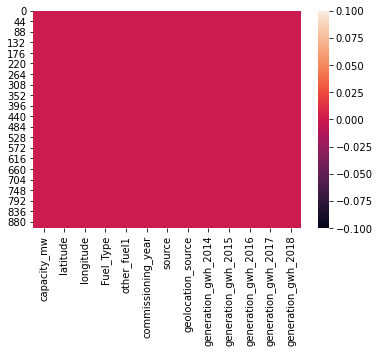

In [26]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull())

Clearly there is no null values

In [27]:
#Getting the columns in the dataset
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'Fuel_Type', 'other_fuel1',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [28]:
# Checking the list of counts of capacity_mw
df['capacity_mw'].value_counts()

5.0       39
10.0      22
15.0      20
600.0     20
1200.0    19
          ..
192.0      1
27.3       1
26.4       1
68.8       1
19.7       1
Name: capacity_mw, Length: 361, dtype: int64

In [29]:
# Checking the list of counts of primary_fuel
df['Fuel_Type'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: Fuel_Type, dtype: int64

In [30]:
# Checking the uniqueness of primary_fuel
df["Fuel_Type"].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

## Feature Extraction

In [31]:
# Checking the list of counts of commissioning_year
df['commissioning_year'].value_counts()

2001.0    395
2015.0     28
2013.0     25
2012.0     23
2016.0     19
         ... 
1958.0      1
1949.0      1
1954.0      1
1956.0      1
1927.0      1
Name: commissioning_year, Length: 73, dtype: int64

In [32]:
# Let's extract power plant age from commissioning year by subtracting it from the year 2020
df["Power_plant_age"] = 2020 - df["commissioning_year"]
df.drop(columns=["commissioning_year"], inplace = True)

Here I have extracted Power plant age from commissioning year and dropped commissioning year columns. From Power plant age we can get to know how old are the power plants.

In [33]:
df.head()

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,9.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,19.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,19.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,16.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,5.0


## Statistical Description of the DataSet

In [34]:
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.427103,1516.689956,1510.071296,1565.361383,1657.121797,1665.011030,21.271224
std,590.085456,6.079148,4.815073,2785.604307,2984.994556,3005.087210,3046.862910,3168.826750,13.158621
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,16.725000,17.072000,74.388900,801.123775,711.181225,737.205450,817.977250,751.644375,17.000000
50%,59.200000,21.281800,76.719500,801.123775,711.181225,737.205450,817.977250,751.644375,19.000000
75%,385.250000,25.176450,79.206100,801.123775,711.181225,737.205450,817.977250,751.644375,22.000000
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,93.000000


Here we can see the statistical analysis of the dataset (numerical only)

We can observe that the count of the columns are same, which means the dataset is balanced. The minimum capacity of the power plant is zero and maximum in 4760 and there is huge difference in mean and standard deviation.From the difference between maximum and 75% percentile we can infer that there are huge outliers present in most of the columns, will remove them using appropriate methods before building our model.

In [35]:
#checking the categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Fuel_Type', 'other_fuel1', 'source', 'geolocation_source']


In [36]:
#checking the numeric columns for visualization
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)       

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'Power_plant_age']


## Data Visualization

### Univariate Analysis
### Categorical column visualization

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: Fuel_Type, dtype: int64


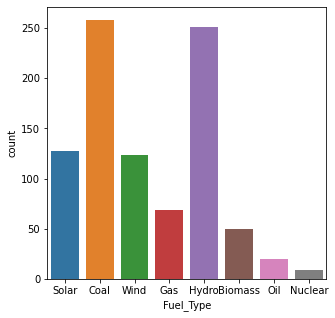

In [37]:
print(df['Fuel_Type'].value_counts())   #visualizing the fuel types in Fuel_Type
plt.figure(figsize=(5,5))
sns.countplot(df['Fuel_Type'])
plt.show()

Here we can see that the 'Coal' energy source is used the highest in the generation of electricity. Then the next energy source used is the 'Hydro' and followed by the other energy sources.

Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


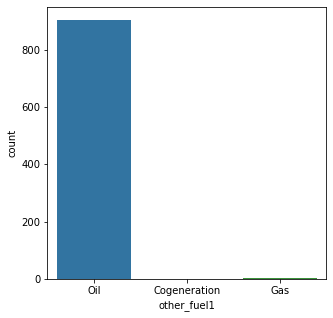

In [38]:
#checking the count of fuel1
print(df['other_fuel1'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(df['other_fuel1'])
plt.show()

It can be observed that 'other_fuel1' type has 3 unique types namely: 'Oil', 'Cogeneration other fuel', 'Gas'. And it is clearly seen that oil is the max used fuel type.

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


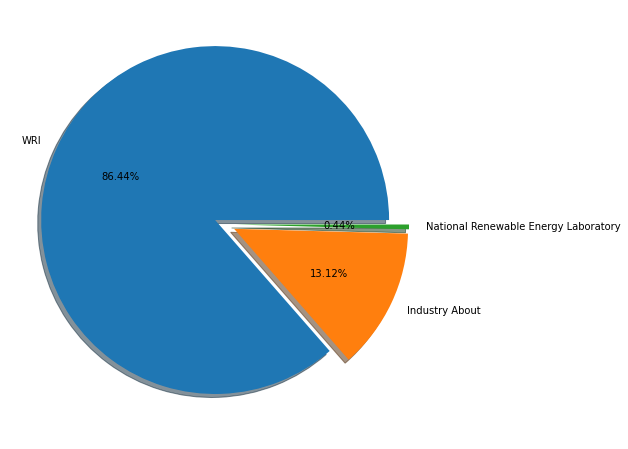

In [39]:
# Visualizing the counts of owner
print(df["geolocation_source"].value_counts())
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True, explode = (0.06,0.06,0.06))
plt.show()

Here it can be seen that the count of WRI is the max, which means that the max information is shared by this source.

5.0       39
10.0      22
15.0      20
600.0     20
1200.0    19
          ..
192.0      1
27.3       1
26.4       1
68.8       1
19.7       1
Name: capacity_mw, Length: 361, dtype: int64


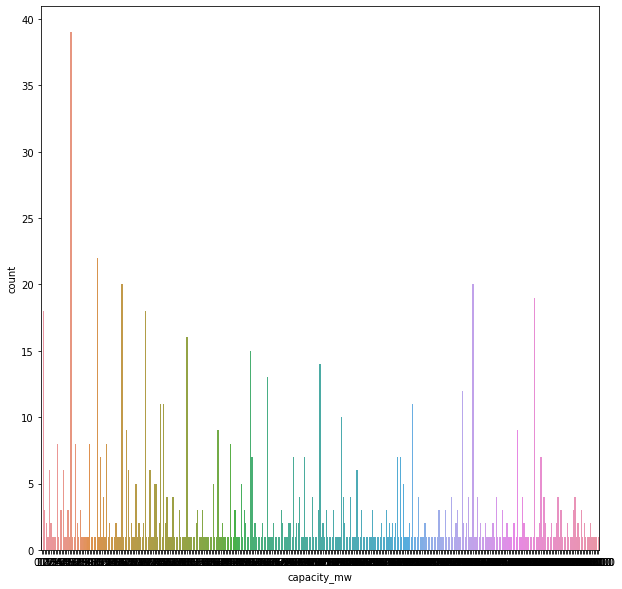

In [40]:
print(df['capacity_mw'].value_counts())   #visualizing the capacity_mw
plt.figure(figsize=(10,10))
sns.countplot(df['capacity_mw'])
plt.show()

## Checking the Distribution of the Dataset, if it is normal

### Numerical Column

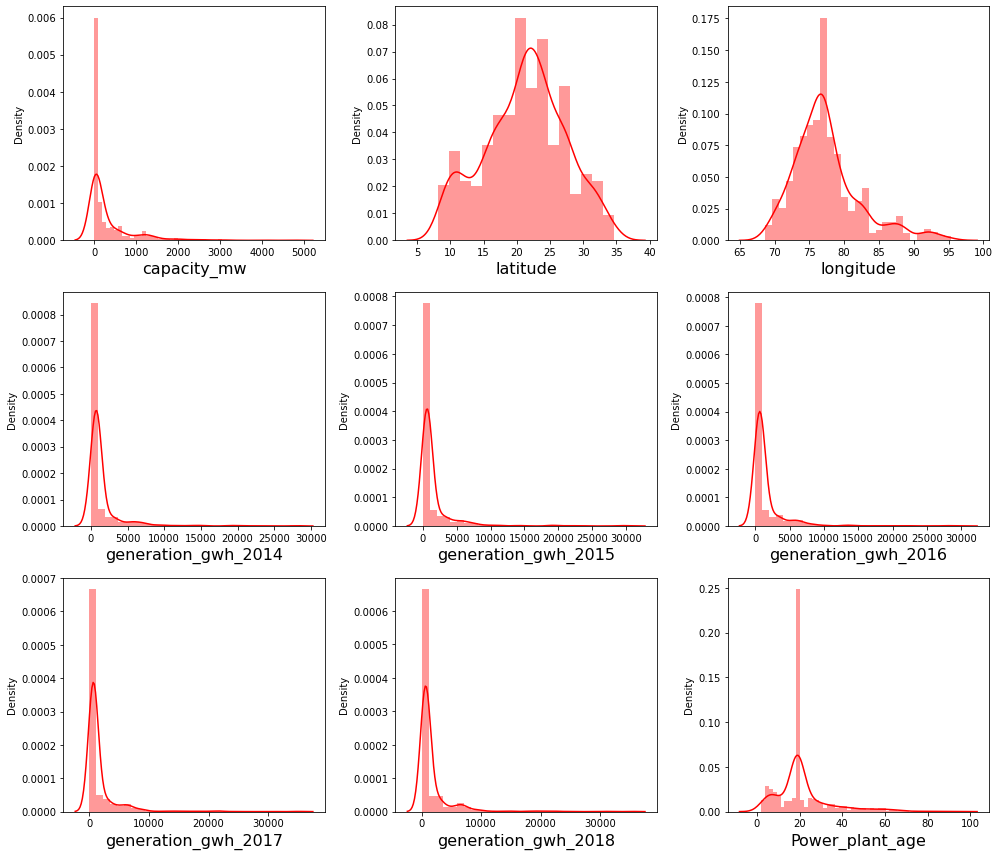

In [41]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(14,12),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color="r")
        plt.xlabel(column,fontsize=16)
    plotnumber+=1
plt.tight_layout()

Here in the plots we can see that the data is not normally distributed. Outliers and skewness is present, which needs to be treated

## Bivariate Analysis

### Corealtion between features and target 'Capacity_mw'

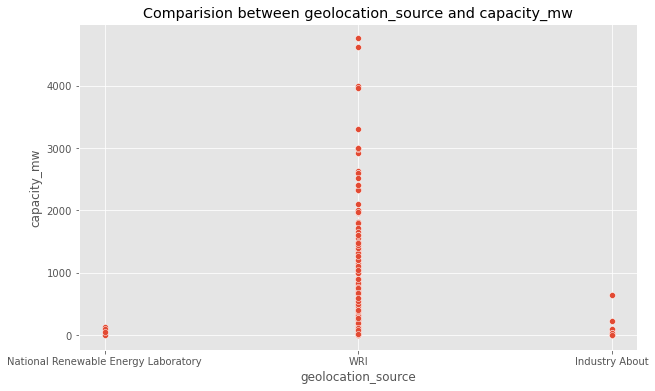

In [42]:
#Checking the relation between target capacity_mw and variable geolocation source
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between geolocation_source and capacity_mw')
sns.scatterplot(df['geolocation_source'],df["capacity_mw"]);

Here also we can see that WRI plats a major role

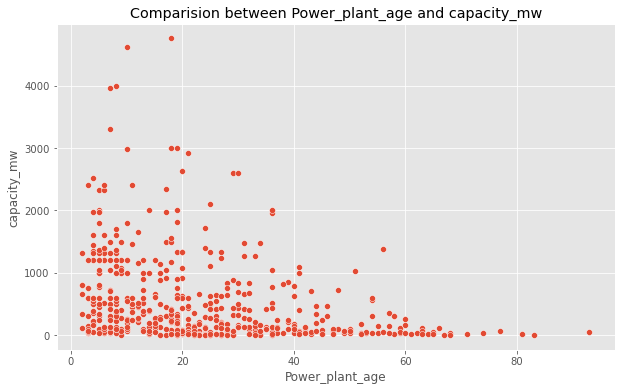

In [43]:
#Checking the relation between power plant age and capacity_mw
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between Power_plant_age and capacity_mw')
sns.scatterplot(df['Power_plant_age'],df["capacity_mw"]);

Here we can see a negative corelation

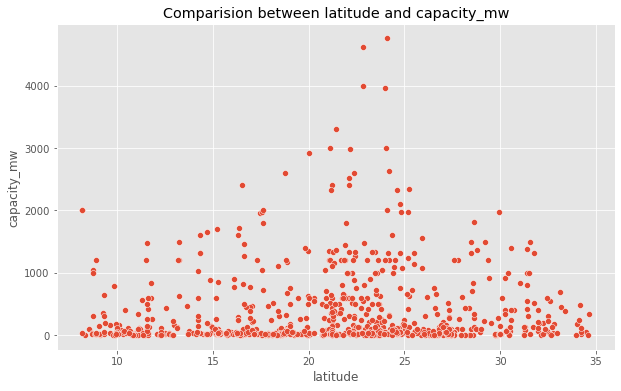

In [44]:
# Checking the relation between feature latitude and targer capacity_mw
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between latitude and capacity_mw')
sns.scatterplot(df['latitude'],df["capacity_mw"]);

Here this feature do not show any linear relationship

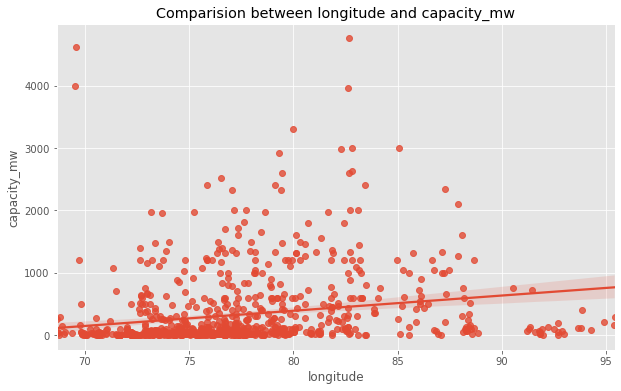

In [45]:
# Checking the relationship between target longitude and capacity_mw
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and capacity_mw')
sns.regplot(df['longitude'],df["capacity_mw"]);

This feature also do not show any linear relationship

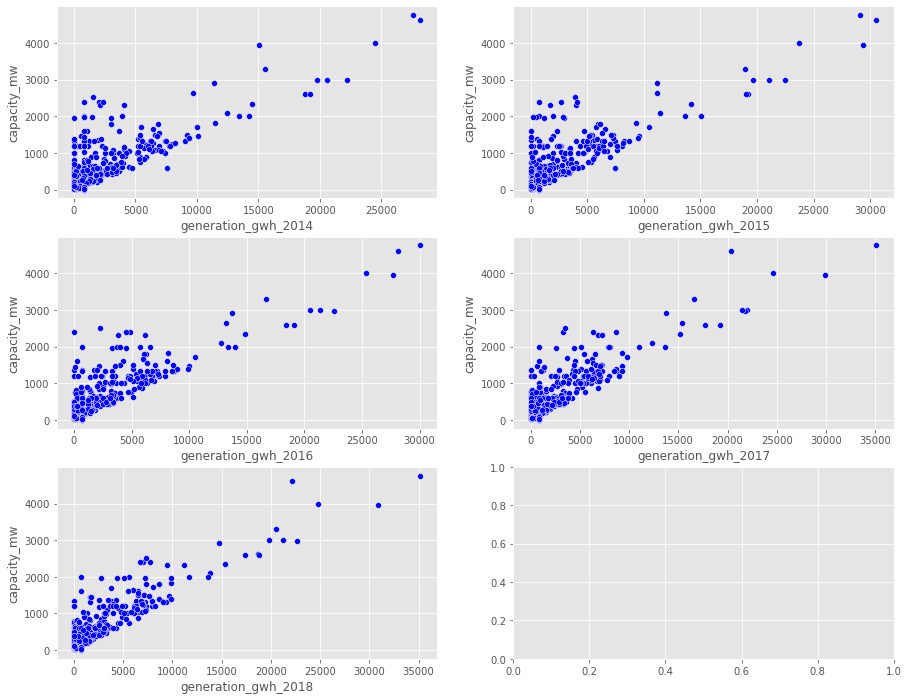

In [46]:
fig,axes=plt.subplots(3,2,figsize=(15,12))

#Checking the relation between feature generation_gwh_2014 and targer capacity_mw
sns.scatterplot(x = "generation_gwh_2014", y = "capacity_mw",ax=axes[0,0],data = df,color="b")

#Checking the relation between feature generation_gwh_2015 and targer capacity_mw
sns.scatterplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,1],data=df,color="b")

#Checking the relation between feature generation_gwh_2016 and targer capacity_mw
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[1,0],data=df,color="b")

#Checking the relation between feature generation_gwh_2017 and targer capacity_mw
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,1],data=df,color="b")

#Checking the relation between feature generation_gwh_2018 and targer capacity_mw
sns.scatterplot(x='generation_gwh_2018',y='capacity_mw',ax=axes[2,0],data=df,color="b")
plt.show()

This features shows a positive corelation. Here the electricity generation reported for the years has capacity above 1000 mw also as the generation growth increases, the capacity of plant is also increasing moderately.

## Corealtion between features and target 'Fuel_Types'

<AxesSubplot:title={'center':'Comparision between Power_plant_age and Fuel_Type'}, xlabel='Power_plant_age', ylabel='Fuel_Type'>

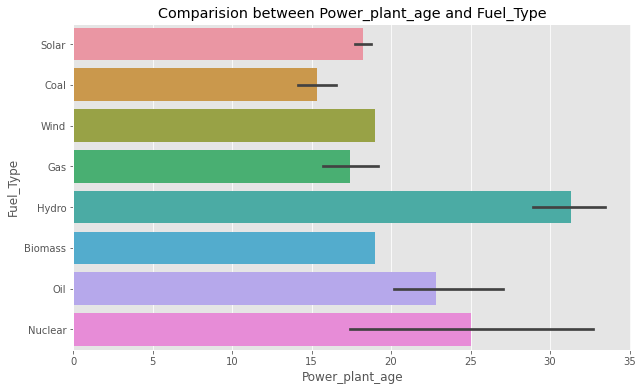

In [47]:
#Checking the relation between target fuel_type and variable Power_plant_age
plt.figure(figsize=[10,6])
plt.title('Comparision between Power_plant_age and Fuel_Type')
sns.barplot(df['Power_plant_age'],df["Fuel_Type"])

Here we can see that older power plants uses Hydro as energy source, followed by oil. The newer power plants are using more of Coal, Solar and Gas

<AxesSubplot:title={'center':'Comparision between latitude and Fuel_Type'}, xlabel='latitude', ylabel='Fuel_Type'>

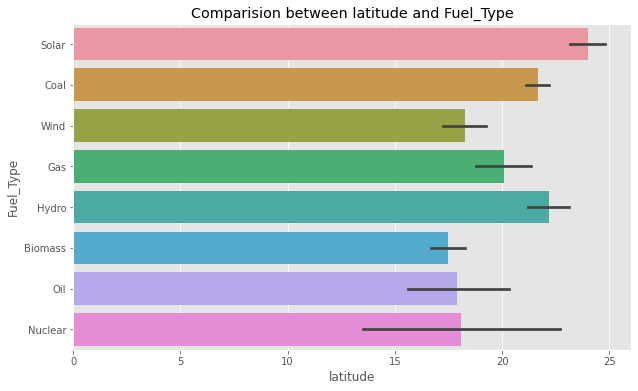

In [48]:
# Checking the relation between feature latitude and targer Fuel_Type
plt.figure(figsize=[10,6])
plt.title('Comparision between latitude and Fuel_Type')
sns.barplot(df['latitude'],df["Fuel_Type"])

The fuel type Solar has high latitude of above 20 followed by Hydro, Coal and Gas . Apart from these types others have less latitude.

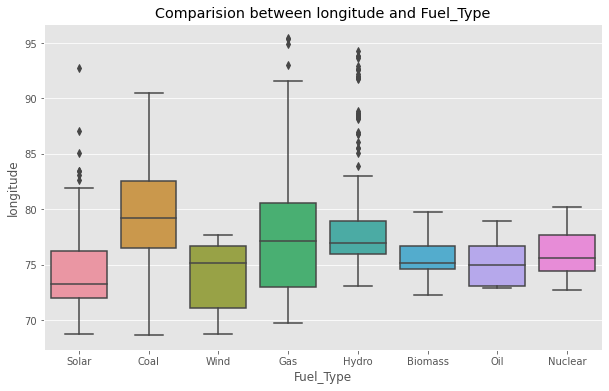

In [49]:
# Let's check how the fuel type is reated to longitude of the power plant
plt.figure(figsize=[10,6])
plt.title('Comparision between longitude and Fuel_Type')
sns.boxplot(df['Fuel_Type'],df["longitude"]);

The fuel type Gas has high longitude followed by Hydro, Solar and Coal. Other fuel types have very less longitude.

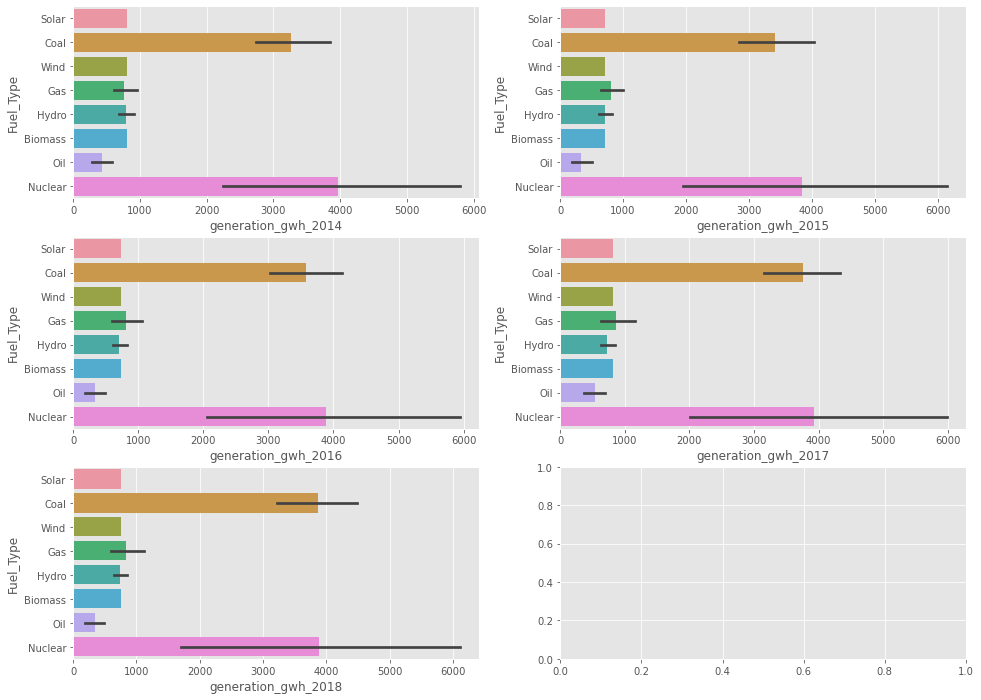

In [50]:
fig,axes=plt.subplots(3,2,figsize=(16,12))

#Checking the relation between feature generation_gwh_2014 and targer Fuel_Type
sns.barplot(x = "generation_gwh_2014", y = "Fuel_Type",ax=axes[0,0],data = df)

#Checking the relation between feature generation_gwh_2015 and targer Fuel_Type
sns.barplot(x='generation_gwh_2015',y='Fuel_Type',ax=axes[0,1],data=df)

#Checking the relation between feature generation_gwh_2016 and targer Fuel_Type
sns.barplot(x='generation_gwh_2016',y='Fuel_Type',ax=axes[1,0],data=df)

#Checking the relation between feature generation_gwh_2017 and targer Fuel_Type
sns.barplot(x='generation_gwh_2017',y='Fuel_Type',ax=axes[1,1],data=df)

#Checking the relation between feature generation_gwh_2018 and targer Fuel_Type
sns.barplot(x='generation_gwh_2018',y='Fuel_Type',ax=axes[2,0],data=df)
plt.show()

From the graph we can notice the fuel type Nuclear has high electrical generation reports for all the years followed by Coal.
Other fuel types have very less power generation reports.

## Checking the relationship between both the targets

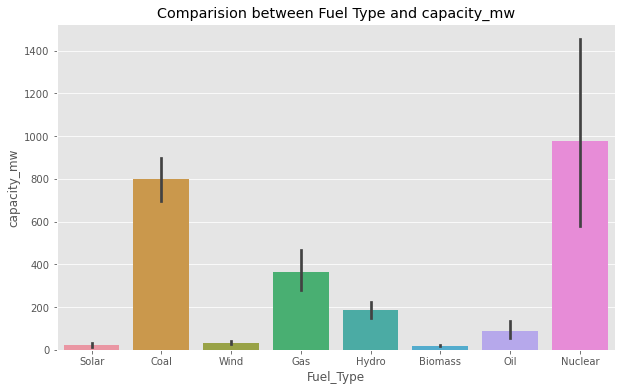

In [51]:
plt.figure(figsize = (10,6))
plt.title("Comparision between Fuel Type and capacity_mw")
sns.barplot(x = "Fuel_Type", y = "capacity_mw", data = df)
plt.show()

The plot shows that the capacity of generating electricity is high in Nuclear followed by Coal.
Also the electricity generating capacity is very less in Solar, Biomass, Wind and other plants.

## Identifying the outliers

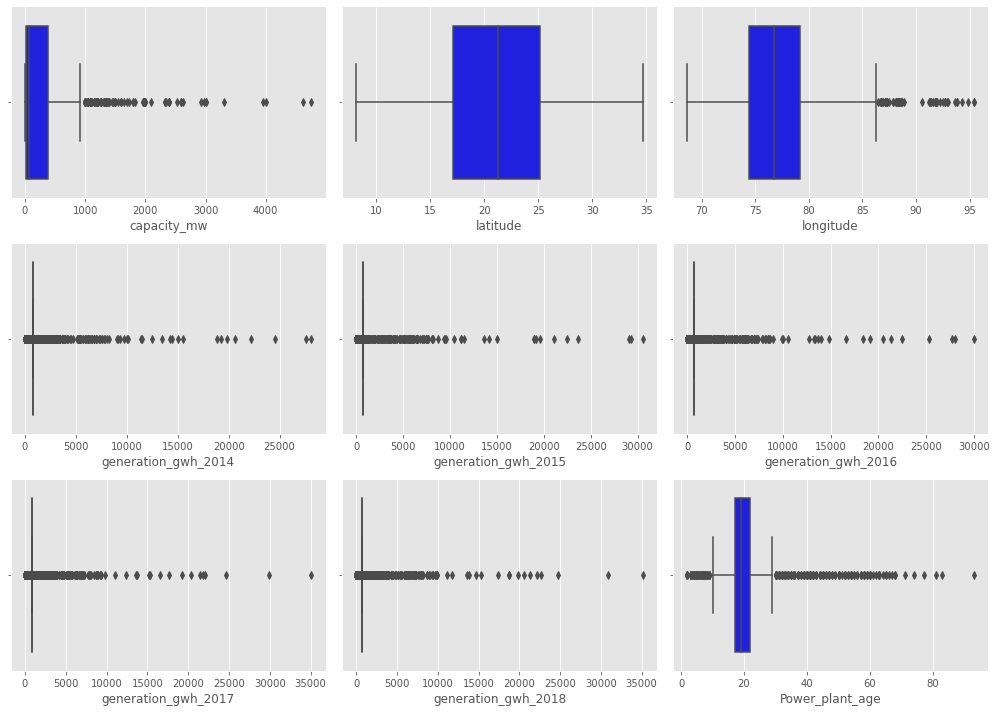

In [62]:
# Identifying the outlierspresent in numerical columns using boxplot

plt.figure(figsize=(14,10),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color="blue")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

In the boxplot we can notice the outliers present in all the columns except latitude. Even target column has outliers but no need to remove it. Let's remove outliers using Zscore method.

In [63]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'Fuel_Type', 'other_fuel1',
       'source', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'Power_plant_age'],
      dtype='object')

In [64]:
# Features containing outliers
features = df[['longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017','generation_gwh_2018','Power_plant_age']]

In [65]:
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z

array([[0.86991672, 0.25702178, 0.26778301, ..., 0.27556459, 0.28839399,
        0.93307603],
       [0.58558978, 0.25702178, 0.26778301, ..., 0.27556459, 0.28839399,
        0.17269871],
       [1.67356683, 0.25702178, 0.26778301, ..., 0.27556459, 0.28839399,
        0.17269871],
       ...,
       [0.38359152, 0.25702178, 0.26778301, ..., 0.27556459, 0.28839399,
        0.17269871],
       [0.76456427, 0.25702178, 0.26778301, ..., 0.27556459, 0.28839399,
        0.17269871],
       [0.0103269 , 0.25702178, 0.26778301, ..., 0.27556459, 0.28839399,
        0.17269871]])

In [66]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,9.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,19.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,19.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,16.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,Central Electricity Authority,WRI,801.123775,0.994875,233.596650,865.400000,686.500000,4.0
903,3.0,12.8932,78.1654,Solar,Oil,Karnataka Power Corporation Limited,Industry About,801.123775,711.181225,737.205450,817.977250,751.644375,19.0
904,25.5,15.2758,75.5811,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,19.0
905,80.0,24.3500,73.7477,Coal,Oil,Hindustan Zinc ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,19.0


This is the new dataframe after removing the outliers. Here we have removed the outliers whose Zscore is less than 3.

In [68]:
# Shape of original dataset
df.shape

(907, 13)

In [69]:
# Shape of new dataframe
new_df.shape

(851, 13)

In [70]:
# Checking the the data loss
data_loss = (907-851)/907*100
data_loss

6.174200661521499

We are losing only 6% of data by removing outliers, hence we are removing outliers.

Let's remove the outliers and check data loss using IQR method.

## 2. IQR (Inter Quantile Range) method

In [71]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [72]:
df1.shape

(420, 13)

In [73]:
# Let's check the dataloss
data_loss = (907-420)/907*100
data_loss

53.69349503858876

Using IQR method we are losing 47% of data, so considering Zscore method for better result.

## Encoding the categorical columns using Label Encoding

In [75]:
categorical_col = ['Fuel_Type', 'other_fuel1', 'source', 'geolocation_source']

In [76]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)

In [77]:
new_df[categorical_col]

,Fuel_Type,other_fuel1,source,geolocation_source
0,6,2,109,1
1,1,2,174,2
2,7,2,21,2
3,2,2,22,2
4,1,2,22,2
...,...,...,...,...
902,1,2,22,2
903,6,2,77,0
904,7,2,21,2
905,1,2,59,2


Now we have encoded the categorical columns using label encoding method.

## Correlation between the target variable and features using HEAT map

In [78]:
# Checking the correlation between features and the target
cor = new_df.corr()
cor

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
capacity_mw,1.000000,0.050588,0.257582,-0.398039,-0.001758,-0.275724,0.234543,0.620202,0.680949,0.750088,0.788972,0.815198,-0.241487
latitude,0.050588,1.000000,-0.014145,-0.002561,0.037049,0.069430,-0.203340,0.081661,0.071346,0.057301,0.071296,0.064558,-0.097033
longitude,0.257582,-0.014145,1.000000,-0.382975,0.029191,-0.235719,0.263739,0.119473,0.154522,0.195299,0.196529,0.204421,-0.080034
Fuel_Type,-0.398039,-0.002561,-0.382975,1.000000,0.006463,0.038558,-0.478601,-0.250101,-0.276308,-0.286624,-0.289232,-0.298364,0.074358
other_fuel1,-0.001758,0.037049,0.029191,0.006463,1.000000,0.028471,-0.022827,-0.000530,0.006092,0.015479,0.011842,0.022700,-0.058103
source,-0.275724,0.069430,-0.235719,0.038558,0.028471,1.000000,-0.497893,-0.141496,-0.156317,-0.158561,-0.156155,-0.165232,-0.075353
geolocation_source,0.234543,-0.203340,0.263739,-0.478601,-0.022827,-0.497893,1.000000,0.113446,0.125329,0.127128,0.125199,0.132477,0.051608
generation_gwh_2014,0.620202,0.081661,0.119473,-0.250101,-0.000530,-0.141496,0.113446,1.000000,0.912185,0.801237,0.746130,0.738063,-0.059768
generation_gwh_2015,0.680949,0.071346,0.154522,-0.276308,0.006092,-0.156317,0.125329,0.912185,1.000000,0.907984,0.830394,0.821726,-0.130252
generation_gwh_2016,0.750088,0.057301,0.195299,-0.286624,0.015479,-0.158561,0.127128,0.801237,0.907984,1.000000,0.932729,0.913720,-0.199087


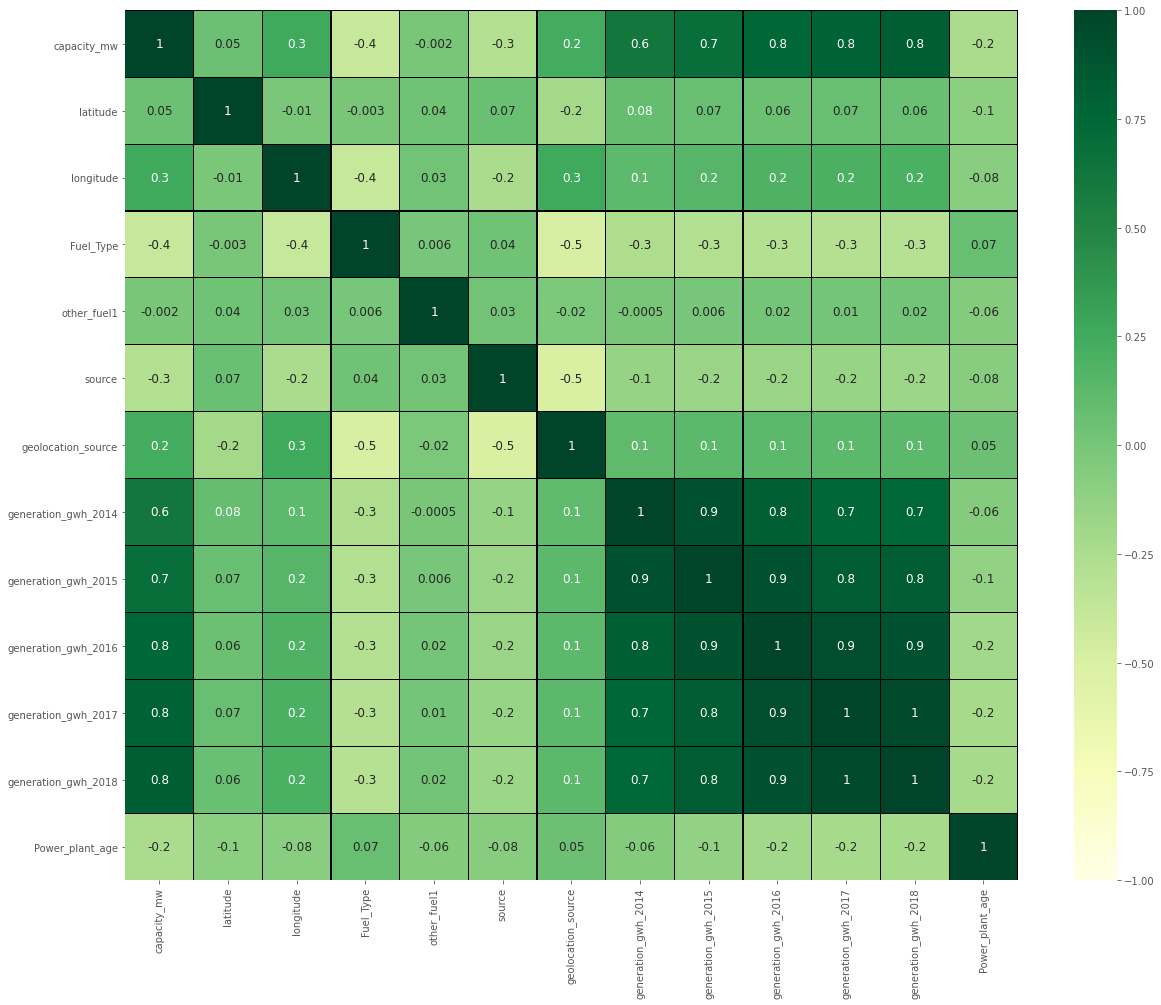

In [83]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(20,16))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':12},cmap="YlGn")
plt.yticks(rotation=0);

This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between feature to feature and feature to label. This heat mapcontains both positive and negative correlation.

### Correlation between capacity_mw and features
- The label capacity_mw is highly positively correlated with the features generation_gwh_2018, generation_gwh_2017, generation_gwh_2016, generation_gwh_2015, generation_gwh_2014.
- And the label is negatively correlated with the features Fuel_Type, source and Power_plant_age.
- The columns other_fuel1 and latitude have no relation with the label, so we can drop them.

### Correlation between Fuel_Type and features
- The label Fuel_Type is less correlated with Power_plant_age and source.
- The label is negatively correlated with geolocation_source, longitude, capacity_mw, and all generation_gwh years.

From the heat map we can notice most of the features are highly correlated with each other which leads to multicollinearity problem. So will try to solve this problem by Checking VIF value before building our models.

Also the features other_fuel1 and latitude have very very less correlation with both the labels. Let's drop those columns.

## Visualizing the correlation between label and features using bar plot

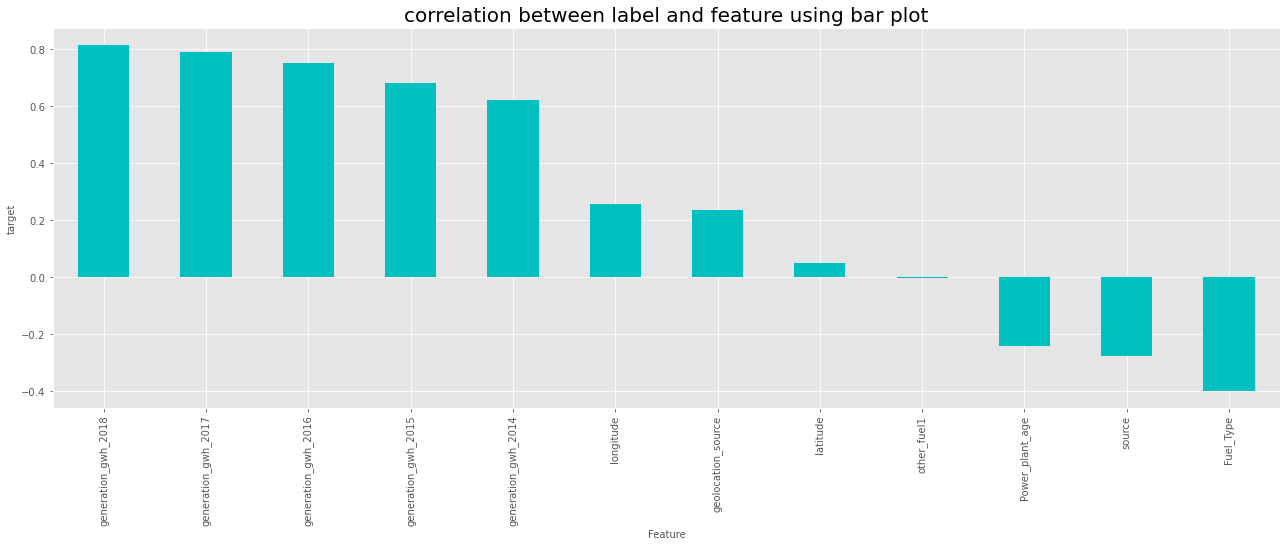

In [85]:
plt.figure(figsize=(22,7))
new_df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

This is the bar plot to check the correlation between capacity_mw and features. Here we can easily notice the positive and negative correlation between the features and the label.

## Visualizing the correlation between label and features using bar plot

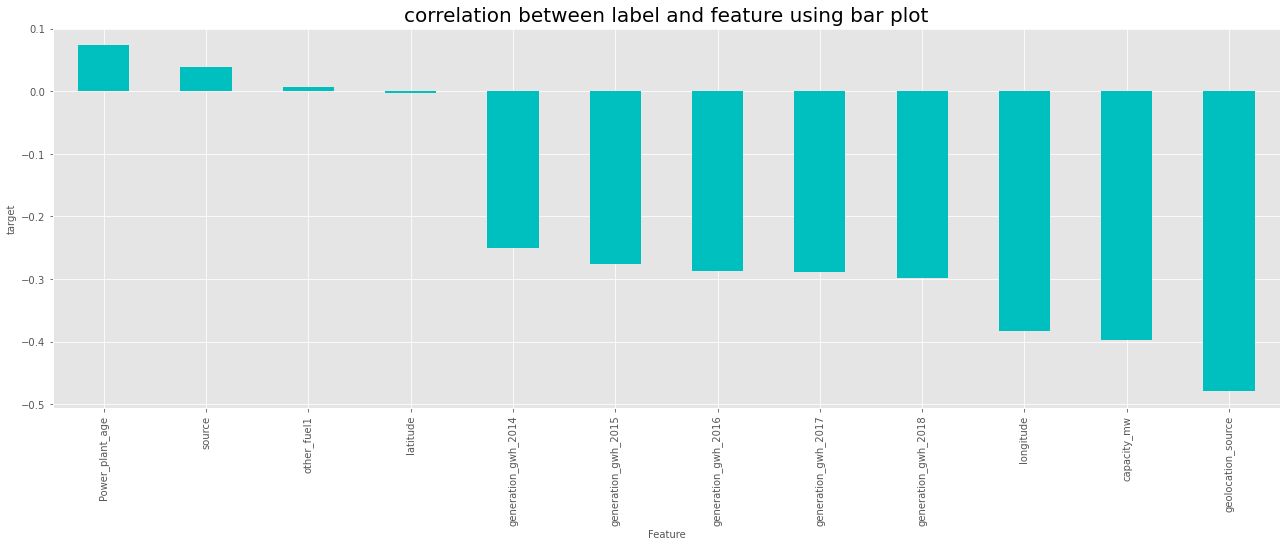

In [86]:
plt.figure(figsize=(22,7))
new_df.corr()['Fuel_Type'].sort_values(ascending=False).drop(['Fuel_Type']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

This is the bar plot to check the correlation between Fuel_Type and features. Here we can easily notice the positive and negative correlation between the features and the label.

From both the bar plots we can observe that the columns other_fuel1 and latitude have very less correlation with both the labels capacity_mw and Fuel_Type. Let's drop those columns.

In [87]:
# Dropping irrelevant columns
new_df.drop("other_fuel1",axis=1,inplace=True)
new_df.drop("latitude",axis=1,inplace=True)

In [88]:
new_df.head()

,capacity_mw,longitude,Fuel_Type,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,73.2407,6,109,1,801.123775,711.181225,737.205450,817.977250,751.644375,9.0
1,98.0,74.6090,1,174,2,801.123775,711.181225,737.205450,817.977250,751.644375,19.0
2,39.2,69.3732,7,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,19.0
3,135.0,91.3602,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,16.0
4,1800.0,82.4091,1,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,5.0


## 1. Prediction for capacity_mw

### Separating the features and label variables into x and y

In [89]:
x = new_df.drop("capacity_mw", axis=1)
y = new_df["capacity_mw"]

In [90]:
# Dimension of x
x.shape

(851, 10)

In [91]:
# Dimension of y
y.shape

(851,)

### Checking for skewness

In [92]:
# Checking the skewness
x.skew()

longitude              0.945877
Fuel_Type              0.413759
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    2.943026
generation_gwh_2015    2.714999
generation_gwh_2016    2.645786
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
Power_plant_age        1.280800
dtype: float64

The following columns have skewness more than +0.5 and -0.5.

- longitude
- generation_gwh_2014
- generation_gwh_2015
- generation_gwh_2016
- generation_gwh_2017
- generation_gwh_2018
- Power_plant_age

Also the columns source and geolocation_source are categorical so no need to remove skewness in these columns.

### Removing skewness using yeo-johnson method

In [94]:
# Making the skew less than or equal to +0.5 and -0.5 for better prediction using yeo-johnson method
skew = ['longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [95]:
x[skew] = scaler.fit_transform(x[skew].values)
x[skew].head()

,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.922012,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.099527
1,-0.499829,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.049538
2,-2.377759,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.049538
3,2.430594,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.247521
4,1.261979,1.426798,2.286603,2.276671,1.983083,2.347272,-1.772979


In [96]:
# Checking skewness after using yeo-johnson ethod
x.skew()

longitude             -0.000128
Fuel_Type              0.413759
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    0.232399
generation_gwh_2015    0.163587
generation_gwh_2016    0.147035
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
Power_plant_age        0.031520
dtype: float64

I have removed the skewness using yeo-johnson method. The skewness has been removed in all the numerical columns.

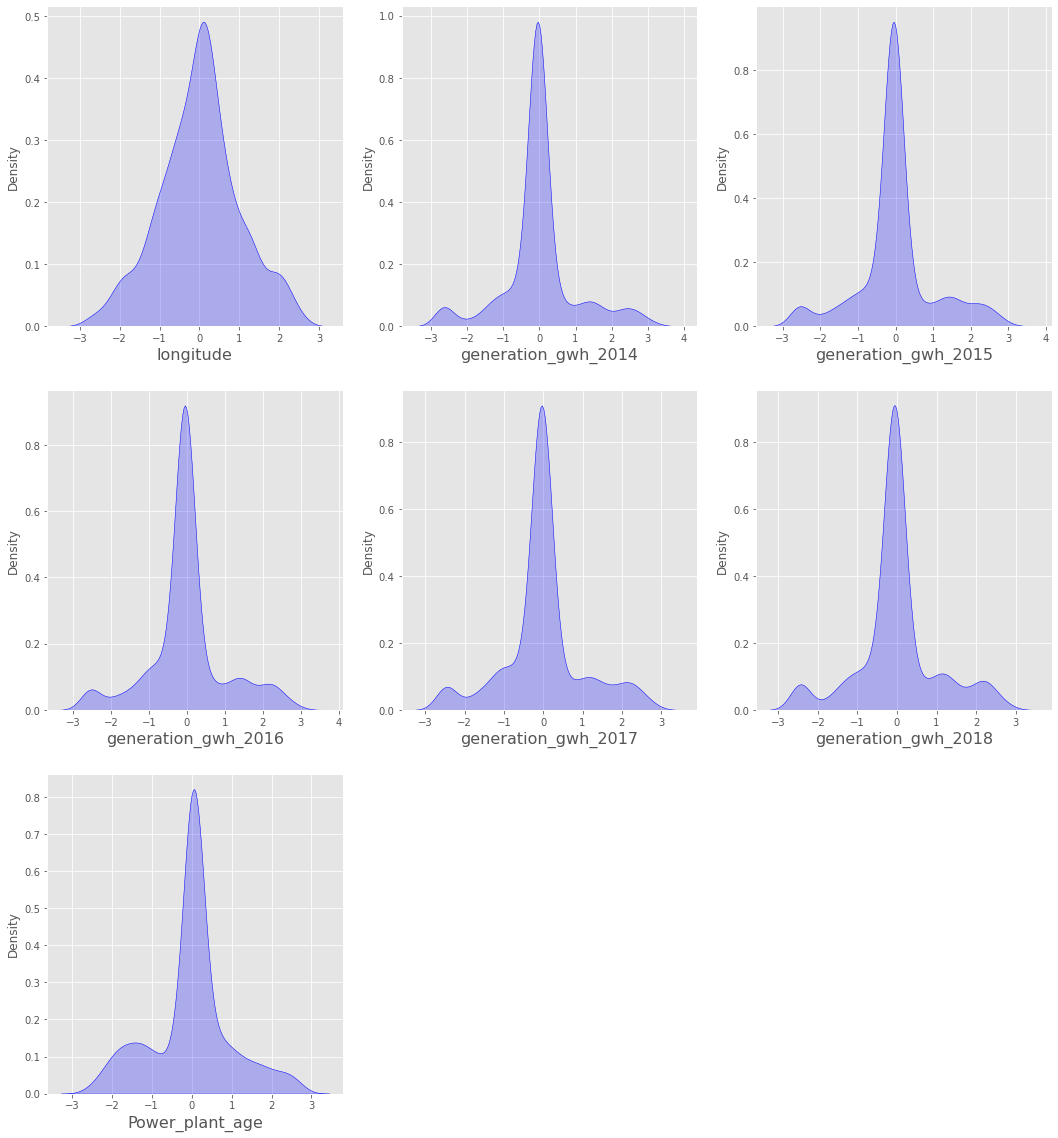

In [102]:
# After removing skewness let's check how the data has been distributed in each column.

plt.figure(figsize=(18,20), facecolor='white')
plotnumber = 1

for column in x[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x[column],color='b',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=16)
    plotnumber+=1
plt.show()

The data is not normal but the skewness has been reduced in all the columns.

### Feature Scaling using Standard Scalarization

In [104]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,longitude,Fuel_Type,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.922012,1.175506,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.099527
1,-0.499829,-0.975797,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.049538
2,-2.377759,1.605767,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.049538
3,2.430594,-0.545536,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.247521
4,1.261979,-0.975797,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.772979
...,...,...,...,...,...,...,...,...,...,...
846,0.231932,-0.975797,-0.507812,0.407145,-0.044061,-2.461379,-0.842266,0.010837,-0.126054,-1.983519
847,0.421592,1.175506,0.696980,-2.480190,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.049538
848,-0.224400,1.605767,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.049538
849,-0.760624,-0.975797,0.302685,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.049538


I have scaled the data using standard scalarizaion method to overcome with the issue of data biasness.

As we have observed in the heat map there is multicollinearity issue exists in the data, So let's check the VIF value and if the columns have VIF greater than 10 then we can drop those columns.

### Checking VIF(Variance Inflation Factor) values

In [105]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.310037,longitude
1,1.683037,Fuel_Type
2,1.503748,source
3,1.875792,geolocation_source
4,3.605461,generation_gwh_2014
5,6.181777,generation_gwh_2015
6,9.956408,generation_gwh_2016
7,9.749054,generation_gwh_2017
8,8.951163,generation_gwh_2018
9,1.104471,Power_plant_age


Here we can observe all the columns have VIF less than 10 which means we are free from multicollinearity problem. Let's move to buliding machine learning models.

In [106]:
# DataFrame after preprocessing and data cleaning
x.head()

,longitude,Fuel_Type,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.922012,1.175506,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.099527
1,-0.499829,-0.975797,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.049538
2,-2.377759,1.605767,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.049538
3,2.430594,-0.545536,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.247521
4,1.261979,-0.975797,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.772979


The dataframe after cleaning and preprocessing.

We have done with the preprocessing and data cleaning. Now let's move to build the model.

## Modeling

### Finding best random state

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [108]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.862675122712114  on Random_state  185


### Creating new train test split

In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [110]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

## Random Forest Regressor

In [111]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
predRFR=RFR.predict(x_test)


print('The R2_Score is:',r2_score(y_test,predRFR))
print('The Mean Absolute Error is:',metrics.mean_absolute_error(y_test, predRFR))
print('The Mean Squared Error is:',metrics.mean_squared_error(y_test, predRFR))
print("The Root Mean Squared Error is:",np.sqrt(metrics.mean_squared_error(y_test, predRFR)))

The R2_Score is: 0.8600995339859352
The Mean Absolute Error is: 83.09350284757912
The Mean Squared Error is: 26430.719200634085
The Root Mean Squared Error is: 162.57527241445447


The R2 score value for Random Forest Regressor model is 86%.

## Decision Tree Regressor

In [113]:
# Checking R2 score for Decision Tree Regressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
predDTR=DTR.predict(x_test)


print('The R2 Score is:',r2_score(y_test,predDTR))
print('The Mean Absolute Error is:',metrics.mean_absolute_error(y_test, predDTR))
print('The Mean Squared Error is:',metrics.mean_squared_error(y_test, predDTR))
print("The Root Mean Squared Error is:",np.sqrt(metrics.mean_squared_error(y_test, predDTR)))

The R2 Score is: 0.7026336612576867
The Mean Absolute Error is: 109.820185546875
The Mean Squared Error is: 56179.98583527637
The Root Mean Squared Error is: 237.02317573451836


The R2 score for Decision Tree Regressor is 70.26%.

## KNeighbors Regressor

In [115]:
# Checking R2 score for Stochastic KNN Regressor
knn=KNN()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)


print('The R2 Score is:',r2_score(y_test,predknn))
print('The Mean Absolute Error is:',metrics.mean_absolute_error(y_test, predknn))
print('The Mean Squared Error is:',metrics.mean_squared_error(y_test, predknn))
print("The Root Mean Squared Error is:",np.sqrt(metrics.mean_squared_error(y_test, predknn)))

The R2 Score is: 0.7890323519830563
The Mean Absolute Error is: 103.93701562500002
The Mean Squared Error is: 39857.09857888156
The Root Mean Squared Error is: 199.6424268007218


The R2 score uisng KNeighbors Regressor is 78.90%.

## GradientBoosting Regressor

In [116]:
# Checking R2 score for GradientBoosting Regressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)


print('The R2 Score is:',r2_score(y_test,predGB))
print('The Mean Absolute Error is:',metrics.mean_absolute_error(y_test, predGB))
print('The Mean Squared Error is:',metrics.mean_squared_error(y_test, predGB))
print("The Root Mean Squared Error is:",np.sqrt(metrics.mean_squared_error(y_test, predGB)))

The R2 Score is: 0.8496906388451589
The Mean Absolute Error is: 90.08587133112862
The Mean Squared Error is: 28397.221475380233
The Root Mean Squared Error is: 168.51475150674565


The R2 score for GradientBoosting Regressor model is 84.96%.

## BaggingRegressor

In [118]:
# Checking R2 score for BaggingRegressor
from sklearn.ensemble import BaggingRegressor
BR=BaggingRegressor()
BR.fit(x_train,y_train)
predBR=BR.predict(x_test)


print('The R2 Score is:',r2_score(y_test,predBR))
print("The Mean Absolute Error is:",metrics.mean_absolute_error(y_test, predBR))
print('The Mean Squared Error is:',metrics.mean_squared_error(y_test, predBR))
print("The Root Mean Squared Error is:",np.sqrt(metrics.mean_squared_error(y_test, predBR)))

The R2 Score is: 0.8682467511175063
The Mean Absolute Error is: 84.52444118593951
The Mean Squared Error is: 24891.50482625523
The Root Mean Squared Error is: 157.77041809621736


The R2 score for BaggingRegressor is 86.82%.

## Checking the cross validation score

In [120]:
from sklearn.model_selection import cross_val_score

In [121]:
# Checking cv score for Random Forest Regressor
print("The Cross Validation Score for Random Forest Regressor is:",cross_val_score(RFR,x,y,cv=5).mean())
# Checking cv score for Decision Tree Regressor
print("The Cross Validation Score for Decision Tree Regressor is:",cross_val_score(DTR,x,y,cv=5).mean())
# Checking cv score for KNN Regressor
print("The Cross Validation Score for KNeighbors Regressor is:",cross_val_score(knn,x,y,cv=5).mean())
# Checking cv score for Gradient Boosting Regressor
print("The Cross Validation Score for Gradient Boosting Regressor is:",cross_val_score(GB,x,y,cv=5).mean())
# Checking cv score for Bagging Regressor
print("The Cross Validation Score for Bagging Regressor is:",cross_val_score(BR,x,y,cv=5).mean())

The Cross Validation Score for Random Forest Regressor is: 0.783767630826455
The Cross Validation Score for Decision Tree Regressor is: 0.6045258254917389
The Cross Validation Score for KNeighbors Regressor is: 0.7242246566967196
The Cross Validation Score for Gradient Boosting Regressor is: 0.7501563670060241
The Cross Validation Score for Bagging Regressor is: 0.7495453428877801


From the above observation, the difference between R2 score and the cross validation score we conclude that Random Forest Regressor as our best fitting model. Let's increse the accuracy of the model by usiing hyper parameter tuning.

## Hyper parameter tuning

In [122]:
from sklearn.model_selection import GridSearchCV

In [123]:
#RandomForestRegressor
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,6]}

In [124]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [125]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 3, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [126]:
GCV.best_params_

{'criterion': 'mae',
 'max_depth': 6,
 'max_features': 'log2',
 'n_estimators': 200}

In [127]:
capacity = RandomForestRegressor(criterion='mse', max_depth=6, max_features='log2', n_estimators=200)
capacity.fit(x_train, y_train)
pred = capacity.predict(x_test)
print("The RMSE value is:",np.sqrt(metrics.mean_squared_error(y_test, predRFR)))
print('The R2_Score is:',r2_score(y_test,pred)*100)

The RMSE value is: 162.57527241445447
The R2_Score is: 87.62338679247799


After tuning the model the R2 score is increased by 1.6% and we are getting R2 score as 87.62% for Random Forest Regressor which is good.

## Saving the model

In [128]:
# Saving the model using .pkl
import joblib
joblib.dump(capacity,"Global_Power_Plant_capacity_mw.pkl")

['Global_Power_Plant_capacity_mw.pkl']

## 2. Fuel_Type (Prediction)
### Seperating the Dataset into Features and Label(Fuel_Type)

In [129]:
x_df = new_df.drop("Fuel_Type", axis=1)
y_df = new_df["Fuel_Type"]

In [132]:
# Dimension of x
x_df.shape

(851, 10)

In [131]:
# Dimension of y
y_df.shape

(851,)

## Checking for skewness

In [134]:
x_df.skew()

capacity_mw            2.170245
longitude              0.945877
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    2.943026
generation_gwh_2015    2.714999
generation_gwh_2016    2.645786
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
Power_plant_age        1.280800
dtype: float64

We can observe the skewness in all the columns but the columns source and geolocation_source are categorical so no need to remove skewness in these columns. Let's remove the skewness in the numerical columns using yeo-johnson method.

## Removing skewness using yeo_johnson method

In [135]:
# Making the skew less than or equal to 0.5 for better prediction using  yeo-johnson method
skew = ['capacity_mw','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [136]:
x_df[skew] = scaler.fit_transform(x_df[skew].values)
x_df[skew].head()

,capacity_mw,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677389,-0.922012,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.099527
1,0.220284,-0.499829,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.049538
2,-0.274381,-2.377759,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.049538
3,0.391670,2.430594,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.247521
4,1.731859,1.261979,1.426798,2.286603,2.276671,1.983083,2.347272,-1.772979


In [137]:
# Checking skewness after using yeo-johnson ethod
x_df.skew()

capacity_mw            0.016303
longitude             -0.000128
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    0.232399
generation_gwh_2015    0.163587
generation_gwh_2016    0.147035
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
Power_plant_age        0.031520
dtype: float64

Now we have removed the skewness in all the numerical columns.

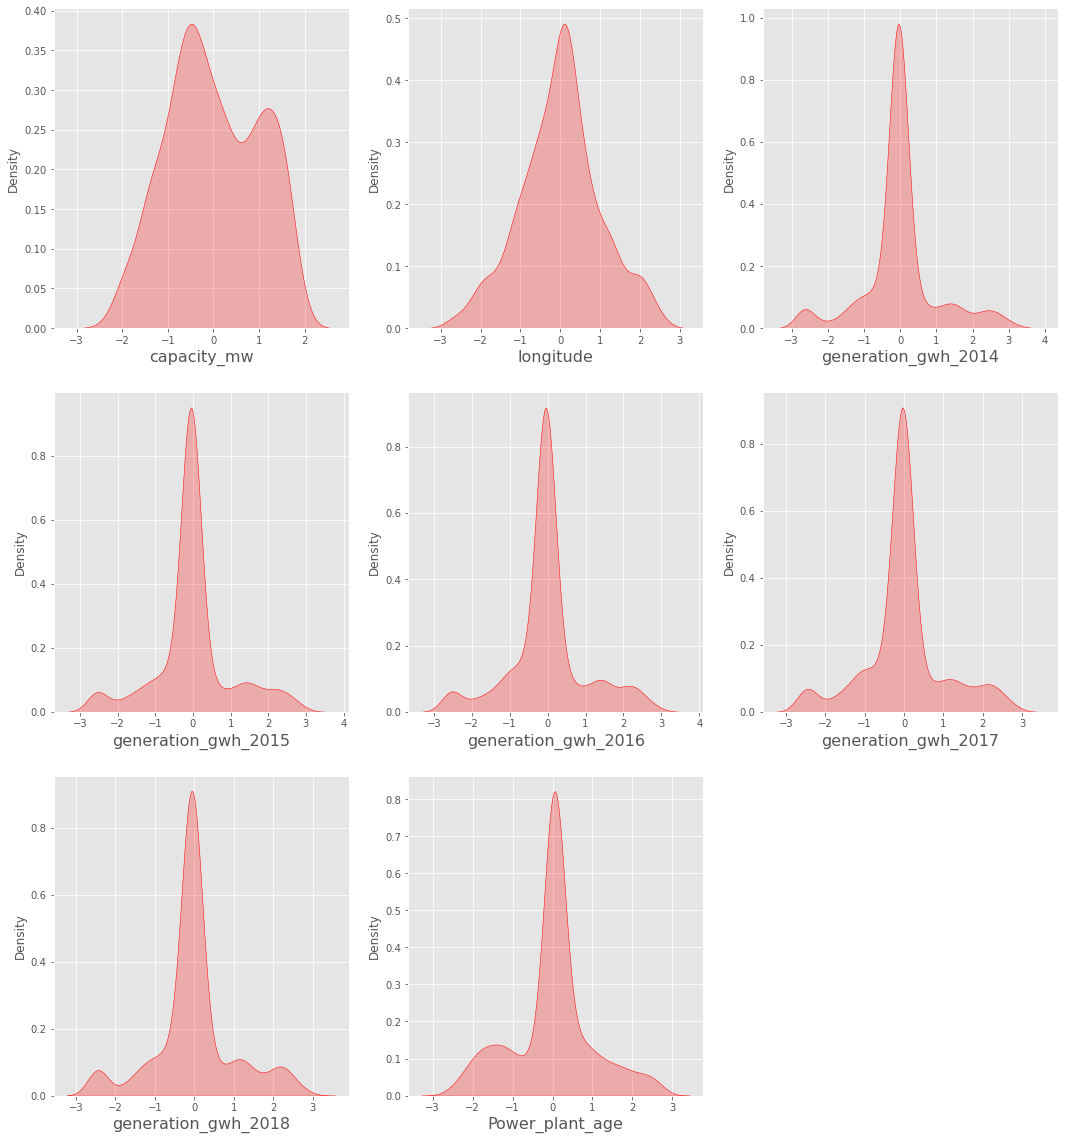

In [139]:
# After removing let's check how the data has been distributed in each column.

plt.figure(figsize=(18,20), facecolor='white')
plotnumber = 1

for column in x_df[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x_df[column],color='red',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=16)
    plotnumber+=1
plt.show()

The data is not normal but we can notice the skewness has been removed.

## Feature Scaling using Standard Scalarization

In [141]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_df = pd.DataFrame(scaler.fit_transform(x_df), columns=x_df.columns)
x_df


,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677389,-0.922012,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.099527
1,0.220284,-0.499829,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.049538
2,-0.274381,-2.377759,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.049538
3,0.391670,2.430594,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.247521
4,1.731859,1.261979,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.772979
...,...,...,...,...,...,...,...,...,...,...
846,1.672840,0.231932,-0.507812,0.407145,-0.044061,-2.461379,-0.842266,0.010837,-0.126054,-1.983519
847,-1.598186,0.421592,0.696980,-2.480190,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.049538
848,-0.507278,-0.224400,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.049538
849,0.111201,-0.760624,0.302685,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.049538


I have scaled the data using standard scalarizaion method to overcome with the issue of data biasness.

As we have observed in the heat map there is multicollinearity issue exists in the data, So let's check the VIF value and if the columns have VIF greater than 10 then we can drop those columns.

## Checking VIF values

In [143]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x_df.values,i)
              for i in range(len(x_df.columns))]
vif["Features"] = x_df.columns

# Let's check the values
vif

,VIF values,Features
0,1.813615,capacity_mw
1,1.193754,longitude
2,1.412982,source
3,1.590963,geolocation_source
4,3.624141,generation_gwh_2014
5,6.190260,generation_gwh_2015
6,9.960006,generation_gwh_2016
7,9.765728,generation_gwh_2017
8,8.960848,generation_gwh_2018
9,1.156613,Power_plant_age


The VIF value is less than 10 in all the columns which means we are free from multicollinearity problem.

In [144]:
y_df.value_counts()

1    238
3    220
6    126
7    123
2     65
0     50
5     20
4      9
Name: Fuel_Type, dtype: int64

Here we can observe that the target variable Fuel_Type has multi classes means it is a multiclassification problem.
Also the data is not balanced so we will use oversampling method to balance the data.

## Oversampling

In [146]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_df, y_df = SM.fit_resample(x_df,y_df)

In [147]:
y_df.value_counts()

0    238
1    238
2    238
3    238
4    238
5    238
6    238
7    238
Name: Fuel_Type, dtype: int64

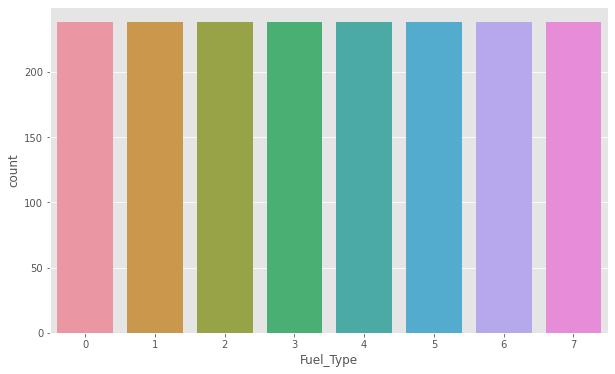

In [149]:
# Visualize the data after balancing
plt.figure(figsize=(10,6))
sns.countplot(y_df)
plt.show()

In [150]:
# DataFrame after preprocessing and data cleaning
x_df.head()

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677389,-0.922012,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.099527
1,0.220284,-0.499829,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.049538
2,-0.274381,-2.377759,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.049538
3,0.391670,2.430594,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.247521
4,1.731859,1.261979,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.772979


## Modeling
## Finding best random state

In [151]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_df_train,x_df_test,y_df_train,y_df_test = train_test_split(x_df,y_df,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_df_train, y_df_train)
    pred = DTC.predict(x_df_test)
    acc=accuracy_score(y_df_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9020979020979021  on Random_state  15


## Creating train_test split

In [152]:
x_df_train,x_df_test,y_df_train,y_df_test=train_test_split(x_df,y_df,test_size=.30,random_state=maxRS)

In [153]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

## Decision Tree Classifier

In [155]:
# Checking Accuracy for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_df_train,y_df_train)
predDTC = DTC.predict(x_df_test)

print("The Accuracy Score is:",accuracy_score(y_df_test, predDTC))
print("The Confusion Matrix is:\n",confusion_matrix(y_df_test, predDTC))
print("The Classification report is:\n",classification_report(y_df_test,predDTC))

The Accuracy Score is: 0.9090909090909091
The Confusion Matrix is:
 [[68  3  0  0  0  2  0  0]
 [ 1 54  6  3  5  2  0  0]
 [ 1  3 56  5  0  5  0  0]
 [ 0  4  4 58  1  0  0  0]
 [ 0  1  0  2 67  1  0  0]
 [ 0  2  1  0  0 57  0  0]
 [ 0  0  0  0  0  0 71  0]
 [ 0  0  0  0  0  0  0 89]]
The Classification report is:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95        73
           1       0.81      0.76      0.78        71
           2       0.84      0.80      0.82        70
           3       0.85      0.87      0.86        67
           4       0.92      0.94      0.93        71
           5       0.85      0.95      0.90        60
           6       1.00      1.00      1.00        71
           7       1.00      1.00      1.00        89

    accuracy                           0.91       572
   macro avg       0.90      0.91      0.90       572
weighted avg       0.91      0.91      0.91       572



Here we are getting 91% accuracy using Decision Tree Classifier.

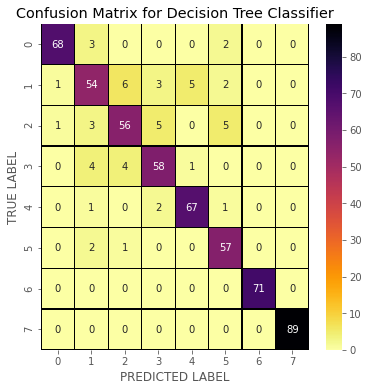

In [157]:
# Lets plot confusion matrix for DTC
cm = confusion_matrix(y_df_test,predDTC)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="inferno_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# Random Forest Classifier

In [158]:
# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_df_train,y_df_train)
predRFC = RFC.predict(x_df_test)


print("The Accuracy Score is:",accuracy_score(y_df_test, predRFC))
print("The Confusion Matrix is:\n",confusion_matrix(y_df_test, predRFC))
print("The Classification Report is:\n",classification_report(y_df_test,predRFC))

The Accuracy Score is: 0.9265734265734266
The Confusion Matrix is:
 [[70  1  0  1  0  1  0  0]
 [ 4 55  3  3  4  2  0  0]
 [ 2  1 58  3  0  6  0  0]
 [ 0  5  2 58  1  1  0  0]
 [ 0  0  0  0 70  1  0  0]
 [ 0  1  0  0  0 59  0  0]
 [ 0  0  0  0  0  0 71  0]
 [ 0  0  0  0  0  0  0 89]]
The Classification Report is:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        73
           1       0.87      0.77      0.82        71
           2       0.92      0.83      0.87        70
           3       0.89      0.87      0.88        67
           4       0.93      0.99      0.96        71
           5       0.84      0.98      0.91        60
           6       1.00      1.00      1.00        71
           7       1.00      1.00      1.00        89

    accuracy                           0.93       572
   macro avg       0.92      0.92      0.92       572
weighted avg       0.93      0.93      0.93       572



The Random Forest Classifier has accuracy 92.65%.

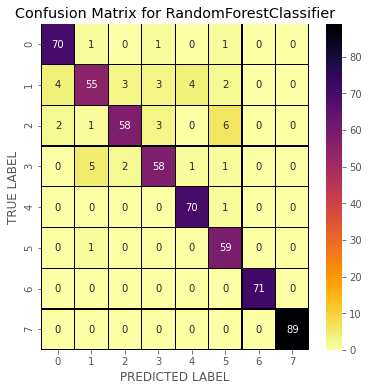

In [159]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_df_test,predRFC)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot = True,linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="inferno_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

## Support Vector Machine Classifier

In [160]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_df_train,y_df_train)
predsvc = svc.predict(x_df_test)


print("The Accuracy Score is:",accuracy_score(y_df_test, predsvc))
print("The Confusion Matrix is:\n",confusion_matrix(y_df_test, predsvc))
print("The Classification Report is:\n",classification_report(y_df_test,predsvc))

The Accuracy Score is: 0.8059440559440559
The Confusion Matrix is:
 [[60  0  0  0  0  2  0 11]
 [10 35  3  1 13  1  0  8]
 [ 3  0 40 11  3 12  0  1]
 [ 0  3  5 43  5  0  0 11]
 [ 0  0  0  0 71  0  0  0]
 [ 2  0  0  0  0 52  0  6]
 [ 0  0  0  0  0  0 71  0]
 [ 0  0  0  0  0  0  0 89]]
The Classification Report is:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81        73
           1       0.92      0.49      0.64        71
           2       0.83      0.57      0.68        70
           3       0.78      0.64      0.70        67
           4       0.77      1.00      0.87        71
           5       0.78      0.87      0.82        60
           6       1.00      1.00      1.00        71
           7       0.71      1.00      0.83        89

    accuracy                           0.81       572
   macro avg       0.82      0.80      0.79       572
weighted avg       0.82      0.81      0.80       572



The accuracy using Support Vector Machine Classifier is 80.59%.

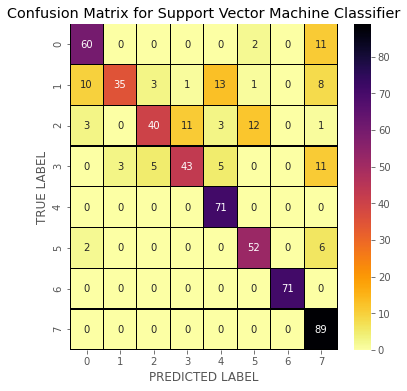

In [161]:
# Lets plot confusion matrix for Support Vector Machine Classifier
cm = confusion_matrix(y_df_test,predsvc)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="inferno_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

## KNeighbors Classifier

In [162]:
# Checking accuracy for KNeighbors Classifier
knn = KNN()
knn.fit(x_df_train,y_df_train)
predknn = knn.predict(x_df_test)


print("The Accuracy Score is:",accuracy_score(y_df_test, predknn))
print("The Confusion Matrix is:\n",confusion_matrix(y_df_test, predknn))
print("The Classification Report is:\n",classification_report(y_df_test,predknn))

The Accuracy Score is: 0.8601398601398601
The Confusion Matrix is:
 [[67  2  0  0  0  2  0  2]
 [ 6 35  6  3 12  2  0  7]
 [ 3  2 53  1  0 10  0  1]
 [ 0  2  7 50  1  0  0  7]
 [ 0  0  0  0 71  0  0  0]
 [ 1  1  0  0  0 57  0  1]
 [ 0  0  0  0  0  0 71  0]
 [ 0  0  0  0  0  1  0 88]]
The Classification Report is:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89        73
           1       0.83      0.49      0.62        71
           2       0.80      0.76      0.78        70
           3       0.93      0.75      0.83        67
           4       0.85      1.00      0.92        71
           5       0.79      0.95      0.86        60
           6       1.00      1.00      1.00        71
           7       0.83      0.99      0.90        89

    accuracy                           0.86       572
   macro avg       0.86      0.86      0.85       572
weighted avg       0.86      0.86      0.85       572



The accuracy using KNN is 86%.

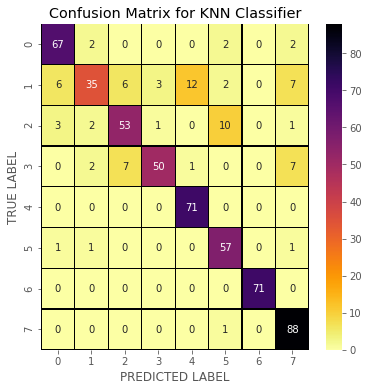

In [164]:
# Lets plot confusion matrix for KNN Classifier
cm = confusion_matrix(y_df_test,predknn)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="inferno_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

## Gradient Boosting Classifier

In [165]:
# Checking accuracy for Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_df_train,y_df_train)
predGB = GB.predict(x_df_test)


print("The Accuracy Score is:",accuracy_score(y_df_test, predGB))
print("The Confusion Matrix is:\n",confusion_matrix(y_df_test, predGB))
print("The Classification Report is:\n",classification_report(y_df_test,predGB))

The Accuracy Score is: 0.8986013986013986
The Confusion Matrix is:
 [[67  1  0  1  0  4  0  0]
 [ 5 55  1  4  5  1  0  0]
 [ 1  6 54  4  1  4  0  0]
 [ 0  7  3 55  1  1  0  0]
 [ 0  0  0  4 66  1  0  0]
 [ 0  3  0  0  0 57  0  0]
 [ 0  0  0  0  0  0 71  0]
 [ 0  0  0  0  0  0  0 89]]
The Classification Report is:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        73
           1       0.76      0.77      0.77        71
           2       0.93      0.77      0.84        70
           3       0.81      0.82      0.81        67
           4       0.90      0.93      0.92        71
           5       0.84      0.95      0.89        60
           6       1.00      1.00      1.00        71
           7       1.00      1.00      1.00        89

    accuracy                           0.90       572
   macro avg       0.90      0.90      0.89       572
weighted avg       0.90      0.90      0.90       572



The accuracy using Gradient Boosting Classifier is 89.86%.

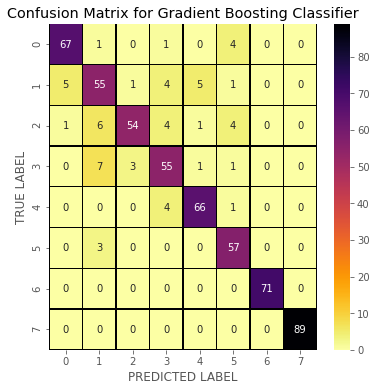

In [167]:
# Lets plot confusion matrix for Gradient Boosting Classifier
cm = confusion_matrix(y_df_test,predGB)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="inferno_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

## Bagging Classifier

In [168]:
# Checking accuracy for BaggingClassifier
from sklearn.ensemble import BaggingClassifier
BC = BaggingClassifier()
BC.fit(x_df_train,y_df_train)
predBC = BC.predict(x_df_test)


print("The Accuracy Score is:",accuracy_score(y_df_test, predBC))
print("The Confusion Matrix is:\n",confusion_matrix(y_df_test, predBC))
print("The Classification Report is:\n",classification_report(y_df_test,predBC))

The Accuracy Score is: 0.9178321678321678
The Confusion Matrix is:
 [[69  1  0  1  0  2  0  0]
 [ 1 56  5  3  4  2  0  0]
 [ 2  2 53  6  1  6  0  0]
 [ 0  2  3 61  1  0  0  0]
 [ 0  0  2  0 68  1  0  0]
 [ 0  2  0  0  0 58  0  0]
 [ 0  0  0  0  0  0 71  0]
 [ 0  0  0  0  0  0  0 89]]
The Classification Report is:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95        73
           1       0.89      0.79      0.84        71
           2       0.84      0.76      0.80        70
           3       0.86      0.91      0.88        67
           4       0.92      0.96      0.94        71
           5       0.84      0.97      0.90        60
           6       1.00      1.00      1.00        71
           7       1.00      1.00      1.00        89

    accuracy                           0.92       572
   macro avg       0.91      0.92      0.91       572
weighted avg       0.92      0.92      0.92       572



The accuracy using BaggingClassifier is 91.78%.

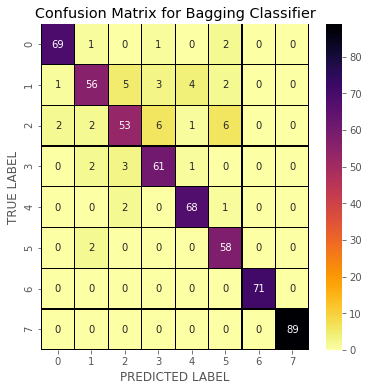

In [171]:
# Lets plot confusion matrix for Bagging Classifier
cm = confusion_matrix(y_df_test,predBC)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="inferno_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Bagging Classifier')
plt.show()

## Checking the Cross Validation Score

In [172]:
from sklearn.model_selection import cross_val_score

# cv score for Decision Tree Classifier
print("The Cross Validation Score for Decision Tree Classifier is:",cross_val_score(DTC,x_df,y_df,cv=5).mean())
# cv score for Random Forest Classifier
print("The Cross Validation Score for Random Forest Classifier is:",cross_val_score(RFC,x_df,y_df,cv=5).mean())
# cv score for Support Vector  Classifier
print("The Cross Validation Score for Support Vector Classifier is:",cross_val_score(svc,x_df,y_df,cv=5).mean())
# cv score for KNN Classifier
print("The Cross Validation Score for KNeighbors Classifier is:",cross_val_score(knn,x_df,y_df,cv=5).mean())
# cv score for Gradient Boosting Classifier
print("The Cross Validation Score for Gradient Boosting Classifier is:",cross_val_score(GB,x_df,y_df,cv=5).mean())
# cv score for BaggingClassifier
print("The Cross Validation Score for Bagging Classifier is:",cross_val_score(BC,x_df,y_df,cv=5).mean())

The Cross Validation Score for Decision Tree Classifier is: 0.8755283878988811
The Cross Validation Score for Random Forest Classifier is: 0.9159621494681586
The Cross Validation Score for Support Vector Classifier is: 0.7998908689045449
The Cross Validation Score for KNeighbors Classifier is: 0.8597789749965464
The Cross Validation Score for Gradient Boosting Classifier is: 0.9007362895427544
The Cross Validation Score for Bagging Classifier is: 0.9044163558502556


The difference between accuracy score and Cross Validation score of Gradient Boosting Classifier is very less compared to other models. So we can conclude that Gradient Boosting Classifier as our best fitting model.

## Hyperparameter Tuning

In [173]:
from sklearn.model_selection import GridSearchCV

In [174]:
#Gradient Boosting Classifier 
parameters = {'criterion':['friedman_mse','mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,5,6,8]}

In [175]:
GCV=GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)

In [176]:
GCV.fit(x_df_train,y_df_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'max_depth': [2, 3, 4, 5, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [178]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 200}

In [179]:
fuel_type =GradientBoostingClassifier (criterion='mse', max_depth=8, max_features='log2', n_estimators=200)
fuel_type.fit(x_df_train, y_df_train)
pred = fuel_type.predict(x_df_test)
acc=accuracy_score(y_df_test,pred)
print("The Accuracy Score is",acc*100)

The Accuracy Score is 93.00699300699301


The accuracy of the best model is increased by 3% after tuning and giving 91.66% accuracy which is good.

## Plotting ROC and compare AUC for the final model

Since our target variable has multiclassification problem so will use label binarize to convert multi classes into binary classes.

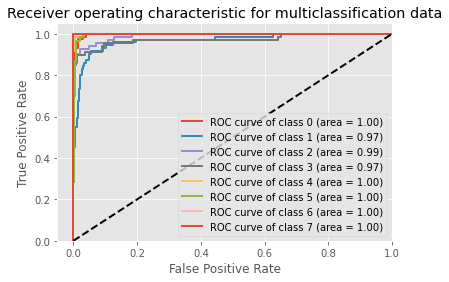

In [180]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier


classifier = OneVsRestClassifier(fuel_type)
y_score = classifier.fit(x_df_train, y_df_train).predict_proba(x_df_test)

#Binarize the output
y_df_test_bin  = label_binarize(y_df_test, classes=[0,1,2,3,4,5,6,7])
n_classes = 8

# Compute ROC curve and AUC for all the classes
false_positive_rate = dict()
true_positive_rate = dict()
roc_auc = dict()
for i in range(n_classes):
    false_positive_rate[i], true_positive_rate[i], _ = roc_curve(y_df_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(false_positive_rate[i], true_positive_rate[i])
    
   
for i in range(n_classes):
    plt.plot(false_positive_rate[i], true_positive_rate[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multiclassification data')
plt.legend(loc="lower right")
plt.show()

This is the AUC-ROC curve for the final model and is plotted False positive rate against True positive rate. Here we can observe the area of all the fuel types.

## Saving the model

In [181]:
# Saving the model using .pkl
import joblib
joblib.dump(fuel_type,"Global_Power_Plant_Fuel_Type.pkl")

['Global_Power_Plant_Fuel_Type.pkl']

## Conclusion

The final R2 score for the prediction of capacity_mw of the power plant using Regression algorithms is = 87%.
The final accuracy for the prediction of Fuel_Type of the power plant using Classification algorithms is = 93%.